### Ensemble - RandomForest & ExtraTree
- learning algorithm: Supervised learning, Ensemble, Bagging
- learninf algorithm: RandomForest
- 
- Bagging: allow repetition, Random Sampling, same model used
    - represent algorithm: RandomForest Classification/Regression
- Pasting: reject repetition, Random Sampling, same model used
    - represent algorithm: ExtraTree Classification/Regression

#### Wine Classification
- feature: alcohol, sugar, pH
- label: class
- 
- wine kind: 0, 1 (red, white I don't know which one is red wine)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
file_path = '../data/wine.csv'
wine_df = pd.read_csv(file_path)

In [3]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine_df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
# label의 class 분포
wine_df['class'].value_counts()

class
1.0    4898
0.0    1599
Name: count, dtype: int64

In [6]:
# feature scaling need..?
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
import seaborn as sns

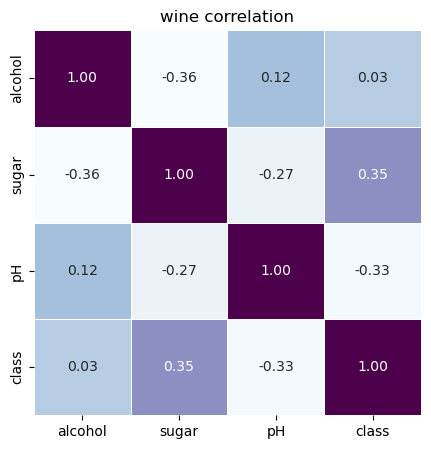

In [8]:
corr_wine = wine_df.corr()

plt.figure(figsize=(5,5))
sns.heatmap(corr_wine, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5, cbar=False)
plt.title('wine correlation')
plt.show()

In [9]:
feature_df = wine_df.drop(columns=['class'])
label_sr = wine_df['class']

print(f"feature: {feature_df.shape}, {feature_df.ndim}D")
print(f"label: {label_sr.shape}, {label_sr.ndim}D")

feature: (6497, 3), 2D
label: (6497,), 1D


In [10]:
# train : test = 8 : 2
# stratify: label
# random_state: 25

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_sr, stratify=label_sr, test_size=0.2, random_state=25)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print(f"X train: {X_train.shape}, {X_train.ndim}D")
print(f"y train: {y_train.shape}, {y_train.ndim}D\n")
print(f"X test: {X_test.shape}, {X_test.ndim}D")
print(f"y test: {y_test.shape}, {y_test.ndim}D\n")
print(f"train & test ratio: {len(X_train)/len(feature_df)*100:.2f} %, {len(X_test)/len(feature_df)*100:.2f} %")

X train: (5197, 3), 2D
y train: (5197,), 1D

X test: (1300, 3), 2D
y test: (1300,), 1D

train & test ratio: 79.99 %, 20.01 %


- ExtraTree
    - 극단적인 DecisonTree
    - reject repetition, Random Sampling, same model used

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

In [17]:
# model instance
# random_state: 25
# 내부에서 100개의 decision tree model의 datasets을 만듦

ex_model = ExtraTreesClassifier(random_state=25, bootstrap=False)
ex_model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=25)

In [18]:
# model parameter
print(f"classes_: {ex_model.classes_}")
print(f"n_classes_: {ex_model.n_classes_}\n")
print(f"feature_names_in_: {ex_model.feature_names_in_}")
print(f"n_features_in_: {ex_model.n_features_in_}")
print(f"feature_importances_: {ex_model.feature_importances_}")

classes_: [0. 1.]
n_classes_: 2

feature_names_in_: ['alcohol' 'sugar' 'pH']
n_features_in_: 3
feature_importances_: [0.19274557 0.52043558 0.28681885]


In [19]:
print(f"(bset?)estimator_: {ex_model.estimator_}\n")
for est in ex_model.estimators_:
    print(est)
print()
# for sample in rf_model.estimators_samples_:
#     print(sample)

(bset?)estimator_: ExtraTreeClassifier()

ExtraTreeClassifier(random_state=1589671044)
ExtraTreeClassifier(random_state=842096958)
ExtraTreeClassifier(random_state=353376730)
ExtraTreeClassifier(random_state=1860790415)
ExtraTreeClassifier(random_state=1197604157)
ExtraTreeClassifier(random_state=424446838)
ExtraTreeClassifier(random_state=798482687)
ExtraTreeClassifier(random_state=776635543)
ExtraTreeClassifier(random_state=1765661612)
ExtraTreeClassifier(random_state=646899634)
ExtraTreeClassifier(random_state=504124157)
ExtraTreeClassifier(random_state=1113162888)
ExtraTreeClassifier(random_state=794434716)
ExtraTreeClassifier(random_state=519300996)
ExtraTreeClassifier(random_state=1879525209)
ExtraTreeClassifier(random_state=752438525)
ExtraTreeClassifier(random_state=241503135)
ExtraTreeClassifier(random_state=1166320116)
ExtraTreeClassifier(random_state=1576597957)
ExtraTreeClassifier(random_state=1122081409)
ExtraTreeClassifier(random_state=1728147623)
ExtraTreeClassifier(rand

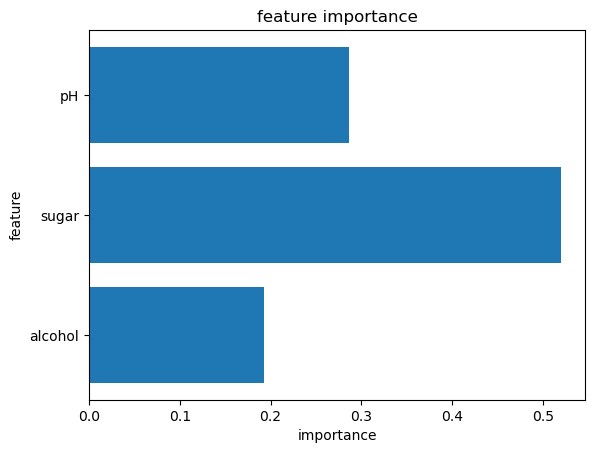

In [20]:
plt.barh(range(ex_model.n_features_in_), ex_model.feature_importances_, align='center')
plt.yticks(np.arange(ex_model.n_features_in_), ex_model.feature_names_in_)
plt.title('feature importance')
plt.xlabel("importance")
plt.ylabel("feature")
plt.show()

- 성능 평가

In [21]:
ex_train_score = ex_model.score(X_train, y_train)
ex_test_score = ex_model.score(X_test, y_test)

print(f"Extra Tree train score: {ex_train_score*100:.2f} %")
print(f"Extra Tree test score: {ex_test_score*100:.2f} %")

Extra Tree train score: 99.79 %
Extra Tree test score: 90.38 %


- RandomizedsearchCV
    - GridSearchCV와 또 다른 Cross Validation Method
    - 값을 일일이 지정하기 여려운 경우에 이용
    - hyperparameter 최적화 class
    - 지정된 범위에서 지정된 횟수만큼 hyperparameter를 추출하여 조합하여 진행
        - n_iter, scoring, cv, return_tarin_score etc

In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
# Random Forest Classifier hyperparameter
params = {'max_depth':range(4, 10), 'min_samples_leaf':range(5, 10), 'criterion':['gini', 'entropy', 'log_loss']}

In [38]:
ex_model = ExtraTreesClassifier(random_state=25)

In [39]:
# verbose: 학습과정을 볼 수 있음
seach_cv = RandomizedSearchCV(ex_model, param_distributions=params, return_train_score=True, n_iter=300, cv=5, verbose=4)

In [40]:
seach_cv.fit(X_train, y_train)

c:\Users\PC\anaconda3\envs\ml_38\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 90 is smaller than n_iter=300. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=5;, score=(train=0.754, test=0.754) total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=5;, score=(train=0.754, test=0.754) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=5;, score=(train=0.754, test=0.755) total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=4, min_samples_leaf=5;, score=(train=0.754, test=0.754) total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=4, min_samples_leaf=5;, score=(train=0.754, test=0.754) total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=4, min_samples_leaf=6;, score=(train=0.754, test=0.754) total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, min_samples_leaf=6;, score=(train=0.754, test=0.754) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=4, min_samples_leaf=6;, score=(train=0.754, test=0.755) total time=   0.0s
[CV 4/5] END criterion=gin

RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=25),
                   n_iter=300,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': range(4, 10),
                                        'min_samples_leaf': range(5, 10)},
                   return_train_score=True, verbose=4)

In [41]:
# model parameter
best_ex_model = seach_cv.best_estimator_
print(f"best_scores_: {seach_cv.best_score_*100:.2f} %")
print(f"best test score: {best_ex_model.score(X_test, y_test)*100:.2f} %")
print(f"best_params_: {seach_cv.best_params_}")
print(f"best_estimator_: {best_ex_model}")

cv_result_df = pd.DataFrame(seach_cv.cv_results_)
cv_result_df[['params', 'mean_train_score', 'mean_test_score', 'rank_test_score']]

best_scores_: 75.39 %
best test score: 75.38 %
best_params_: {'min_samples_leaf': 5, 'max_depth': 4, 'criterion': 'gini'}
best_estimator_: ExtraTreesClassifier(max_depth=4, min_samples_leaf=5, random_state=25)


,params,mean_train_score,mean_test_score,rank_test_score
0,"{'min_samples_leaf': 5, 'max_depth': 4, 'crite...",0.753896,0.753896,1
1,"{'min_samples_leaf': 6, 'max_depth': 4, 'crite...",0.753896,0.753896,1
2,"{'min_samples_leaf': 7, 'max_depth': 4, 'crite...",0.753896,0.753896,1
3,"{'min_samples_leaf': 8, 'max_depth': 4, 'crite...",0.753896,0.753896,1
4,"{'min_samples_leaf': 9, 'max_depth': 4, 'crite...",0.753896,0.753896,1
...,...,...,...,...
85,"{'min_samples_leaf': 5, 'max_depth': 9, 'crite...",0.753896,0.753896,1
86,"{'min_samples_leaf': 6, 'max_depth': 9, 'crite...",0.753896,0.753896,1
87,"{'min_samples_leaf': 7, 'max_depth': 9, 'crite...",0.753896,0.753896,1
88,"{'min_samples_leaf': 8, 'max_depth': 9, 'crite...",0.753896,0.753896,1
